# Hackathon

In [1]:
!pip install impyute

In [37]:
import numpy as np
import pandas as pd
import os
from impyute.imputation.cs import mice
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('chained_assignment',None)

In [38]:
os.chdir('D:\Data analysis\DataScience Academy\Python course\Python Capstone')

In [39]:
train_df = pd.read_csv('./train.csv')

test_df = pd.read_csv('./test.csv')

total_df = pd.concat([train_df, test_df], ignore_index=True)

total_df.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247


In [40]:
print(train_df.shape)

print(test_df.shape)

(3865, 80)
(890, 79)


In [41]:
print('Number of unique Galaxies: ',total_df['galaxy'].nunique())

print('Number of years the data was kept: ',total_df['galactic year'].nunique())

total_df.drop(['galaxy', 'galactic year', 'y'], axis=1, inplace=True)

Number of unique Galaxies:  181
Number of years the data was kept:  27


In [42]:
print('Train missing values: ', train_df.isna().sum().sum())
print('Test missing values: ', test_df.isna().sum().sum())

Train missing values:  185698
Test missing values:  19834


## Data Cleaning

In [43]:
# This code is taking too long to run, that's why I saved the final result to a .csv file,
# And imported it aftewards


# train_to_mice = train_df.drop(['galaxy'], axis=1)

# imputed_training = mice(train_to_mice.values)

# train_mice = pd.DataFrame(data =imputed_training, columns = train_to_mice.columns.tolist())

In [44]:
train_mice = pd.read_csv('./train_mice.csv')

train_mice.drop(['Unnamed: 0'], axis=1, inplace=True)

train_mice.isnull().sum()

galactic year                                                                0
existence expectancy index                                                   0
existence expectancy at birth                                                0
Gross income per capita                                                      0
Income Index                                                                 0
                                                                            ..
Adjusted net savings                                                         0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0
Private galaxy capital flows (% of GGP)                                      0
Gender Inequality Index (GII)                                                0
y                                                                            0
Length: 79, dtype: int64

## Data Preprocessing

In [45]:
train_mice['galaxy'] = train_df['galaxy']

train_df.columns

Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15–64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expect

In [46]:
 # Making the order of the columns as in the original frame

new_list = ['galactic year',
 'galaxy',
 'existence expectancy index',
 'existence expectancy at birth',
 'Gross income per capita',
 'Income Index',
 'Expected years of education (galactic years)',
 'Mean years of education (galactic years)',
 'Intergalactic Development Index (IDI)',
 'Education Index',
 'Intergalactic Development Index (IDI), Rank',
 'Population using at least basic drinking-water services (%)',
 'Population using at least basic sanitation services (%)',
 'Gross capital formation (% of GGP)',
 'Population, total (millions)',
 'Population, urban (%)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Mortality rate, infant (per 1,000 live births)',
 'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
 'Population, ages 15–64 (millions)',
 'Population, ages 65 and older (millions)',
 'Life expectancy at birth, male (galactic years)',
 'Life expectancy at birth, female (galactic years)',
 'Population, under age 5 (millions)',
 'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
 'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
 'Total unemployment rate (female to male ratio)',
 'Vulnerable employment (% of total employment)',
 'Unemployment, total (% of labour force)',
 'Employment in agriculture (% of total employment)',
 'Labour force participation rate (% ages 15 and older)',
 'Labour force participation rate (% ages 15 and older), female',
 'Employment in services (% of total employment)',
 'Labour force participation rate (% ages 15 and older), male',
 'Employment to population ratio (% ages 15 and older)',
 'Jungle area (% of total land area)',
 'Share of employment in nonagriculture, female (% of total employment in nonagriculture)',
 'Youth unemployment rate (female to male ratio)',
 'Unemployment, youth (% ages 15–24)',
 'Mortality rate, female grown up (per 1,000 people)',
 'Mortality rate, male grown up (per 1,000 people)',
 'Infants lacking immunization, red hot disease (% of one-galactic year-olds)',
 'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)',
 'Gross galactic product (GGP) per capita',
 'Gross galactic product (GGP), total',
 'Outer Galaxies direct investment, net inflows (% of GGP)',
 'Exports and imports (% of GGP)',
 'Share of seats in senate (% held by female)',
 'Natural resource depletion',
 'Mean years of education, female (galactic years)',
 'Mean years of education, male (galactic years)',
 'Expected years of education, female (galactic years)',
 'Expected years of education, male (galactic years)',
 'Maternal mortality ratio (deaths per 100,000 live births)',
 'Renewable energy consumption (% of total final energy consumption)',
 'Estimated gross galactic income per capita, male',
 'Estimated gross galactic income per capita, female',
 'Rural population with access to electricity (%)',
 'Domestic credit provided by financial sector (% of GGP)',
 'Population with at least some secondary education, female (% ages 25 and older)',
 'Population with at least some secondary education, male (% ages 25 and older)',
 'Gross fixed capital formation (% of GGP)',
 'Remittances, inflows (% of GGP)',
 'Population with at least some secondary education (% ages 25 and older)',
 'Intergalactic inbound tourists (thousands)',
 'Gross enrolment ratio, primary (% of primary under-age population)',
 'Respiratory disease incidence (per 100,000 people)',
 'Interstellar phone subscriptions (per 100 people)',
 'Interstellar Data Net users, total (% of population)',
 'Current health expenditure (% of GGP)',
 'Intergalactic Development Index (IDI), female',
 'Intergalactic Development Index (IDI), male',
 'Gender Development Index (GDI)',
 'Intergalactic Development Index (IDI), female, Rank',
 'Intergalactic Development Index (IDI), male, Rank',
 'Adjusted net savings ',
 'Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total',
 'Private galaxy capital flows (% of GGP)',
 'Gender Inequality Index (GII)',
 'y']

In [47]:
train_mice['galaxy'].value_counts()

Andromeda XXII[57]                             26
Tucana Dwarf                                   26
Andromeda XXIV                                 26
Andromeda XIX[60]                              26
Andromeda XII                                  26
                                               ..
Sagittarius Dwarf Irregular Galaxy (SagDIG)    17
Aquarius Dwarf Galaxy (DDO 210)                17
Andromeda XXI[57]                              17
Pegasus Dwarf Irregular (DDO 216)              17
NGC 5253                                        1
Name: galaxy, Length: 181, dtype: int64

In [48]:
print('Number of unique Galaxies in the train_mice data: ',train_mice['galaxy'].nunique())

print('Number unique galaxies in the test data: ',test_df['galaxy'].nunique())

Number of unique Galaxies in the train_mice data:  181
Number unique galaxies in the test data:  172


In [49]:
# To find the name of the galaxies that are not in the test dataset we will use the set() function

set(train_mice['galaxy'].tolist()) ^ set(test_df['galaxy'].tolist())

{'Andromeda XII',
 'Andromeda XIX[60]',
 'Andromeda XVIII[60]',
 'Andromeda XXII[57]',
 'Andromeda XXIV',
 'Hercules Dwarf',
 'NGC 5253',
 'Triangulum Galaxy (M33)',
 'Tucana Dwarf'}

In [50]:
# Then we are deleting those galaxy names that are not in the test dataset

df_train = train_mice.loc[~train_mice['galaxy'].isin(['Andromeda XII',
 'Andromeda XIX[60]',
 'Andromeda XVIII[60]',
 'Andromeda XXII[57]',
 'Andromeda XXIV',
 'Hercules Dwarf',
 'NGC 5253',
 'Triangulum Galaxy (M33)',
 'Tucana Dwarf'])]

In [51]:
## To see if the galaxy names are dropped 

set(df_train['galaxy'].tolist()) ^ set(test_df['galaxy'].tolist())

set()

## Exploratory Data Analysis

In [52]:
## The heatmap of correlations between features across the dataset

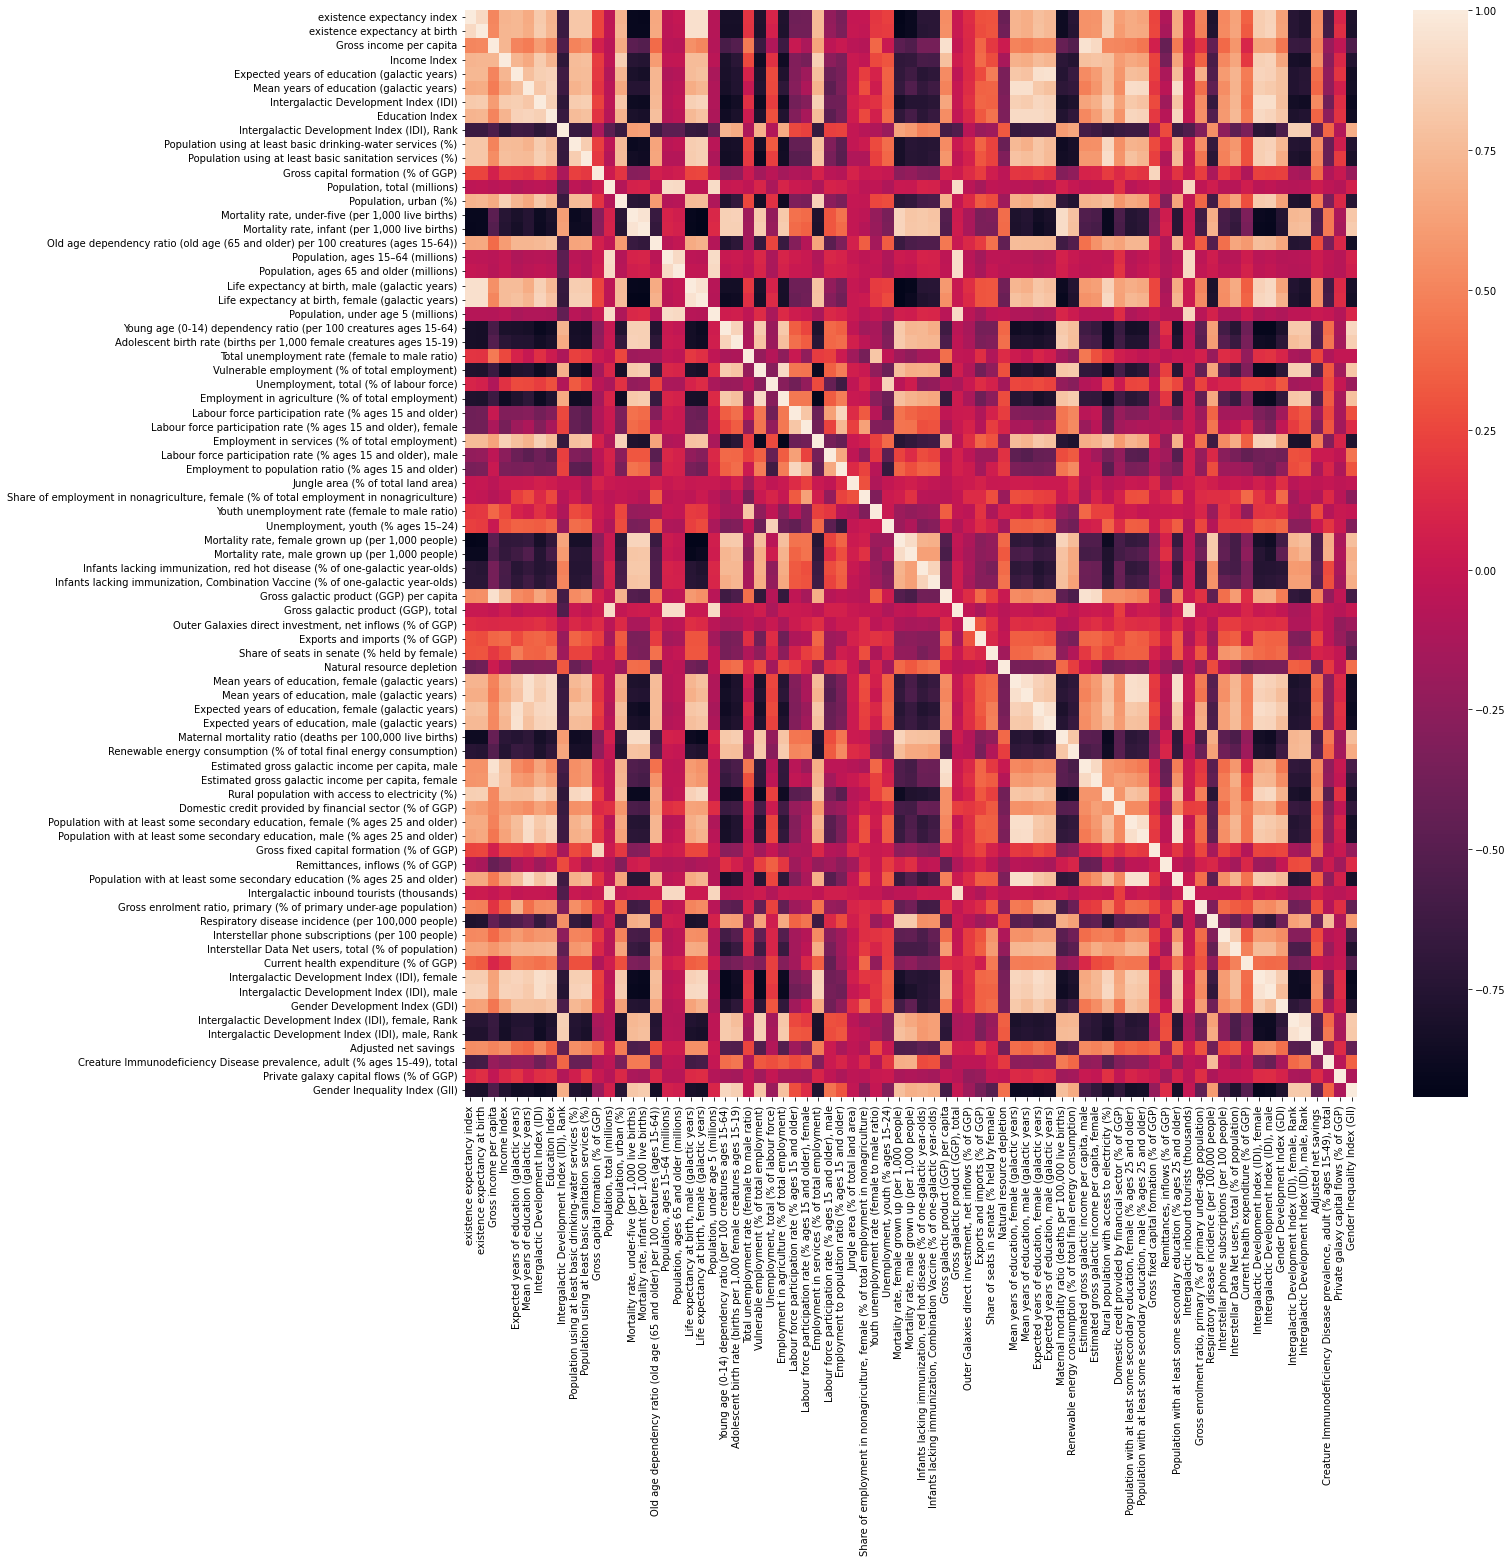

In [53]:
test_na = test_df.dropna()
train_na = df_train.dropna()
total_df = pd.concat([train_na, test_na], ignore_index=True)
total_df.drop(['galactic year','galaxy','y'],axis=1, inplace=True)

corrMatrix = total_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=False)
plt.show()

In [54]:
## Here we are looking at the distribution of the training and test dataset

# We see tails that move to the right which tells us that the data is skewed

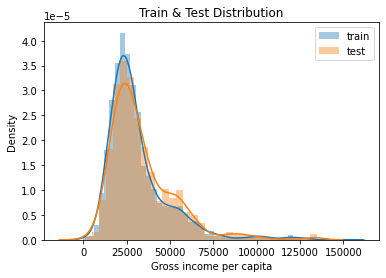

In [55]:
sns.distplot(df_train['Gross income per capita'], label='train')
sns.distplot(test_df['Gross income per capita'], label='test')
plt.title('Train & Test Distribution')
plt.legend()
plt.show()

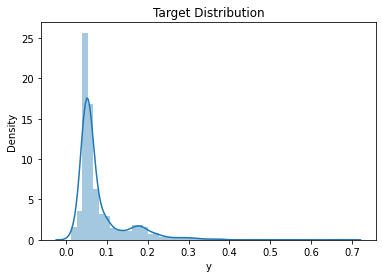

In [56]:
sns.distplot(df_train['y'], label='train')
plt.title('Target Distribution')

plt.show()

## Feature Engineering and Feature Selection

In [57]:
## Creating dummies with one-hot encoded galaxy names

train_dummies = pd.get_dummies(df_train['galaxy'])
test_dummies = pd.get_dummies(test_df['galaxy'])

In [58]:
total = train_df.isnull().sum().sort_values(ascending=False)

percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])

missing_data.head()

,Total,Percent
Gender Inequality Index (GII),3021,0.781630
Current health expenditure (% of GGP),2998,0.775679
"Interstellar Data Net users, total (% of population)",2993,0.774386
Private galaxy capital flows (% of GGP),2991,0.773868
Interstellar phone subscriptions (per 100 people),2974,0.769470


In [59]:
missing_data.loc[missing_data['Percent']>0.7]

,Total,Percent
Gender Inequality Index (GII),3021,0.781630
Current health expenditure (% of GGP),2998,0.775679
"Interstellar Data Net users, total (% of population)",2993,0.774386
Private galaxy capital flows (% of GGP),2991,0.773868
Interstellar phone subscriptions (per 100 people),2974,0.769470
"Intergalactic Development Index (IDI), male, Rank",2973,0.769211
"Intergalactic Development Index (IDI), female, Rank",2972,0.768952
"Respiratory disease incidence (per 100,000 people)",2969,0.768176
Adjusted net savings,2953,0.764036
Gender Development Index (GDI),2951,0.763519


In [60]:
list_of_missing_data = missing_data.loc[missing_data['Percent']>0.7].index.tolist()


list_of_missing_data

['Gender Inequality Index (GII)',
 'Current health expenditure (% of GGP)',
 'Interstellar Data Net users, total (% of population)',
 'Private galaxy capital flows (% of GGP)',
 'Interstellar phone subscriptions (per 100 people)',
 'Intergalactic Development Index (IDI), male, Rank',
 'Intergalactic Development Index (IDI), female, Rank',
 'Respiratory disease incidence (per 100,000 people)',
 'Adjusted net savings ',
 'Gender Development Index (GDI)',
 'Intergalactic Development Index (IDI), male',
 'Intergalactic Development Index (IDI), female',
 'Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total',
 'Intergalactic inbound tourists (thousands)',
 'Remittances, inflows (% of GGP)',
 'Rural population with access to electricity (%)',
 'Gross enrolment ratio, primary (% of primary under-age population)',
 'Population with at least some secondary education (% ages 25 and older)',
 'Estimated gross galactic income per capita, female',
 'Estimated gross galactic inc

In [61]:
## We will delete the columns with more than 70% of missing data

df_train.drop(list_of_missing_data, axis= 1, inplace = True)

In [62]:
df_train.shape

(3664, 49)

In [63]:
impute_data =df_train.drop(['galaxy'], axis=1)

In [64]:
X = impute_data.drop(['y'], axis=1)

y = impute_data['y']

In [65]:
## Then we will drop the features that have correlation greater than 0.9

num_columns = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_columns = list(impute_data.select_dtypes(include =num_columns).columns)

impute_data = impute_data[numerical_columns]

impute_data.shape

train_features, test_features, train_labels, test_labels = train_test_split(
    X,    y,
    test_size=0.2,
    random_state=101)

correlated_features = set()

correlated_matrix = impute_data.corr()

for i in range(len(correlated_matrix.columns)):
    for j in range(i):
        if abs(correlated_matrix.iloc[i, j])>0.9:
            colname = correlated_matrix.columns[i]
            correlated_features.add(colname)

train_features.drop(correlated_features, axis=1, inplace = True)
test_features.drop(correlated_features, axis=1,inplace = True)

train_features.shape, test_features.shape

((2931, 32), (733, 32))

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest

In [67]:
## Selecting 10 best features that will help us to get the maximum results

sel = SelectKBest(k=10).fit(train_features, train_labels)

In [68]:
X_train_t = sel.transform(train_features)

X_test_t = sel.transform(test_features)

In [69]:
selected_columns = train_features.columns[sel.get_support()]

print(selected_columns)

Index(['Labour force participation rate (% ages 15 and older), male',
       'Employment to population ratio (% ages 15 and older)',
       'Jungle area (% of total land area)',
       'Share of employment in nonagriculture, female (% of total employment in nonagriculture)',
       'Youth unemployment rate (female to male ratio)',
       'Unemployment, youth (% ages 15–24)',
       'Infants lacking immunization, red hot disease (% of one-galactic year-olds)',
       'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)',
       'Outer Galaxies direct investment, net inflows (% of GGP)',
       'Renewable energy consumption (% of total final energy consumption)'],
      dtype='object')


In [70]:
best_features = selected_columns.tolist()

best_features

['Labour force participation rate (% ages 15 and older), male',
 'Employment to population ratio (% ages 15 and older)',
 'Jungle area (% of total land area)',
 'Share of employment in nonagriculture, female (% of total employment in nonagriculture)',
 'Youth unemployment rate (female to male ratio)',
 'Unemployment, youth (% ages 15–24)',
 'Infants lacking immunization, red hot disease (% of one-galactic year-olds)',
 'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)',
 'Outer Galaxies direct investment, net inflows (% of GGP)',
 'Renewable energy consumption (% of total final energy consumption)']

In [71]:
best_features.append('y')

In [72]:
# We get the final data set for the predictive model

df = impute_data[best_features]
X = df.drop(['y'], axis=1)
y = df['y']

In [73]:
## We used the same mice imputation for the test_data as well 

## It takes some time to run so I imported the final results

# test_to_mice = test_df.drop(['galaxy'], axis=1)

# imputed_training = mice(train_to_mice.values)

# test_mice = pd.DataFrame(data =imputed_training, columns = test_to_mice.columns.tolist())

In [74]:
test_mice = pd.read_csv('./test_mice .csv')

test_mice.drop(['Unnamed: 0'], axis = 1, inplace = True)


test_mice.isnull().sum()

galactic year                                                                0
existence expectancy index                                                   0
existence expectancy at birth                                                0
Gross income per capita                                                      0
Income Index                                                                 0
                                                                            ..
Intergalactic Development Index (IDI), male, Rank                            0
Adjusted net savings                                                         0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0
Private galaxy capital flows (% of GGP)                                      0
Gender Inequality Index (GII)                                                0
Length: 78, dtype: int64

In [75]:
# list of columns left for prediction:

data_columns = X.columns.tolist()

In [76]:
df_test = test_mice[data_columns]

In [77]:
df_test.head()

,"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)","Outer Galaxies direct investment, net inflows (% of GGP)",Renewable energy consumption (% of total final energy consumption)
0,76.665786,68.723915,54.024559,55.235882,2.084922,29.357150,47.536706,32.058210,23.624294,87.810349
1,82.811897,71.975595,47.534120,49.480294,2.072737,24.441284,53.989870,35.790719,21.505583,100.527190
2,83.776428,80.151492,44.510520,50.257101,2.904496,20.989906,48.448045,31.923937,19.194018,104.241446
3,79.843988,73.507368,50.990381,53.307598,2.070415,24.638381,47.470858,32.078702,19.351602,83.009547
4,88.782958,76.502740,56.338491,45.923296,2.043633,23.401352,92.815852,76.093251,8.248885,96.028122


In [78]:
#  Join datasets with encoded galaxy names

X_joined_dummies = X.join(train_dummies)
df_test_joined_dummies = df_test.join(test_dummies)

In [79]:
X = X_joined_dummies

df_test_pred = df_test_joined_dummies

In [80]:
# rename columns with galaxies from alphabetic names to numbers

galaxy_rename_list = train_dummies.columns.tolist()

i = 1
for name in galaxy_rename_list:
    X.rename(columns={name: i}, inplace=True)
    df_test_pred.rename(columns={name: i}, inplace=True)
    i = i + 1

## Modeling

#### The Random Forest

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [86]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)
rand_score = round(random_forest.score(X_train, y_train)*100,3)

rand_score

96.42

## Performance Evaluation

In [89]:
# Predictions

y_pred_rf = random_forest.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("RMSE: %f" % (rmse))

y_pred_test_rf = random_forest.predict(df_test_pred)

RMSE: 0.031441


In [113]:
final_df = pd.DataFrame()

final_df['index'] = list(range(1,891))

final_df['preds'] = y_pred_test_rf

final_df

,index,preds
0,1,0.041181
1,2,0.041634
2,3,0.039198
3,4,0.046452
4,5,0.048185
...,...,...
885,886,0.056883
886,887,0.056274
887,888,0.058662
888,889,0.060214


## Optimization

In [114]:
# This code will get the best parameters so the model will perform at its' best
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor



model = CatBoostRegressor()
parameters = {'depth'         : [3, 4, 5],
              'learning_rate' : [0.05, 0.1, 0.2],
              'iterations'    : [8000, 12000],
              'subsample'     : [0.3, 0.5, 1]
             }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    

0:	learn: 0.0601556	total: 138ms	remaining: 27m 38s
1:	learn: 0.0592136	total: 147ms	remaining: 14m 42s
2:	learn: 0.0583729	total: 149ms	remaining: 9m 57s
3:	learn: 0.0575182	total: 151ms	remaining: 7m 34s
4:	learn: 0.0567563	total: 153ms	remaining: 6m 7s
5:	learn: 0.0559502	total: 156ms	remaining: 5m 10s
6:	learn: 0.0552500	total: 157ms	remaining: 4m 29s
7:	learn: 0.0546027	total: 159ms	remaining: 3m 58s
8:	learn: 0.0539868	total: 162ms	remaining: 3m 35s
9:	learn: 0.0534043	total: 164ms	remaining: 3m 16s
10:	learn: 0.0527739	total: 165ms	remaining: 3m
11:	learn: 0.0522132	total: 167ms	remaining: 2m 47s
12:	learn: 0.0517240	total: 169ms	remaining: 2m 35s
13:	learn: 0.0513099	total: 171ms	remaining: 2m 26s
14:	learn: 0.0508935	total: 173ms	remaining: 2m 17s
15:	learn: 0.0504426	total: 175ms	remaining: 2m 10s
16:	learn: 0.0500157	total: 177ms	remaining: 2m 4s
17:	learn: 0.0495527	total: 179ms	remaining: 1m 58s
18:	learn: 0.0491693	total: 180ms	remaining: 1m 53s
19:	learn: 0.0487512	total

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001EB5CC97C40>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5], 'iterations': [8000, 12000],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'subsample': [0.3, 0.5, 1]})

In [115]:
# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
      grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
      grid.best_score_)

print("\n The best parameters across:\n",grid.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8937738416926253

 The best parameters across:
 {'depth': 3, 'iterations': 12000, 'learning_rate': 0.05, 'subsample': 1}


In [116]:
model = CatBoostRegressor(iterations=12000,
                          learning_rate=0.05,
                          subsample=1,
                          depth=3)

In [117]:
model.fit(X_train,y_train)

0:	learn: 0.0601556	total: 2.05ms	remaining: 24.6s
1:	learn: 0.0592136	total: 4.08ms	remaining: 24.5s
2:	learn: 0.0583729	total: 5.79ms	remaining: 23.2s
3:	learn: 0.0575182	total: 7.56ms	remaining: 22.7s
4:	learn: 0.0567563	total: 9.59ms	remaining: 23s
5:	learn: 0.0559502	total: 11.6ms	remaining: 23.2s
6:	learn: 0.0552500	total: 13.4ms	remaining: 22.9s
7:	learn: 0.0546027	total: 15.2ms	remaining: 22.8s
8:	learn: 0.0539868	total: 17.1ms	remaining: 22.7s
9:	learn: 0.0534043	total: 18.7ms	remaining: 22.4s
10:	learn: 0.0527739	total: 20.6ms	remaining: 22.4s
11:	learn: 0.0522132	total: 22.3ms	remaining: 22.3s
12:	learn: 0.0517240	total: 24.1ms	remaining: 22.3s
13:	learn: 0.0513099	total: 25.9ms	remaining: 22.2s
14:	learn: 0.0508935	total: 27.6ms	remaining: 22.1s
15:	learn: 0.0504426	total: 29.3ms	remaining: 21.9s
16:	learn: 0.0500157	total: 31ms	remaining: 21.8s
17:	learn: 0.0495527	total: 32.4ms	remaining: 21.6s
18:	learn: 0.0491693	total: 33.8ms	remaining: 21.3s
19:	learn: 0.0487512	total

In [118]:
# Predictions

y_pred = model.predict(X_test)

In [119]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.019599


In [120]:
y_pred_test_cat = model.predict(df_test_pred)

In [121]:
final_df['opt_preds'] = y_pred_test_cat

final_df

,index,preds,opt_preds
0,1,0.041181,0.049108
1,2,0.041634,0.046716
2,3,0.039198,0.036925
3,4,0.046452,0.033184
4,5,0.048185,0.048791
...,...,...,...
885,886,0.056883,0.050446
886,887,0.056274,0.049626
887,888,0.058662,0.067526
888,889,0.060214,0.062661


In [124]:
final_df.to_csv('Hackathon.csv', index=None)

In [125]:
pd.read_csv('./Capstone_project_2.csv')

,index,preds,opt_preds
0,1,0.041181,0.049108
1,2,0.041634,0.046716
2,3,0.039198,0.036925
3,4,0.046452,0.033184
4,5,0.048185,0.048791
...,...,...,...
885,886,0.056883,0.050446
886,887,0.056274,0.049626
887,888,0.058662,0.067526
888,889,0.060214,0.062661
